# Plots for paper  
  
This Jupyter notebook contains the essential plots of previous notebooks used for our argumentation within the paper.  
  
Version 1.0  
Date: 2024-01-15  
Current version: hannes.waclawek@fh-salzburg.ac.at  

In [3]:
import copy

# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
import multiprocessing as mp
from itertools import repeat

from tfspline import model, parallel, plot, sampledata

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
%load_ext autoreload
%autoreload 2

# Input Data


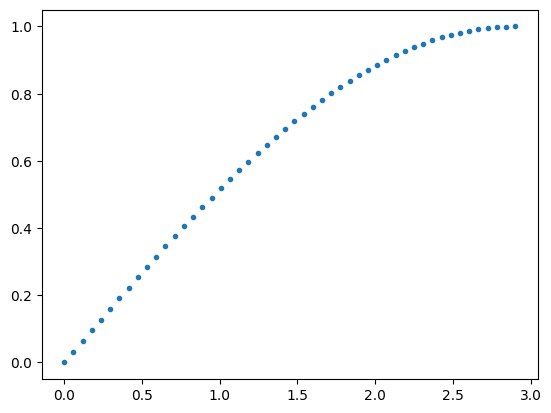

In [5]:
# The data set to approximate with x and y samples
xss_ori = np.linspace(0, 0.5*np.pi, 100, dtype="double")
xss = sampledata.rescale_input_data(xss_ori, 1)
xs2_ori = np.linspace(0, 0.5*np.pi, 50)
ys2 = np.sin(xs2_ori)
#plt.plot(xs2_ori, ys2, '.')
xs2 = sampledata.rescale_input_data(xs2_ori, 2.9)
plt.plot(xs2, ys2, '.')

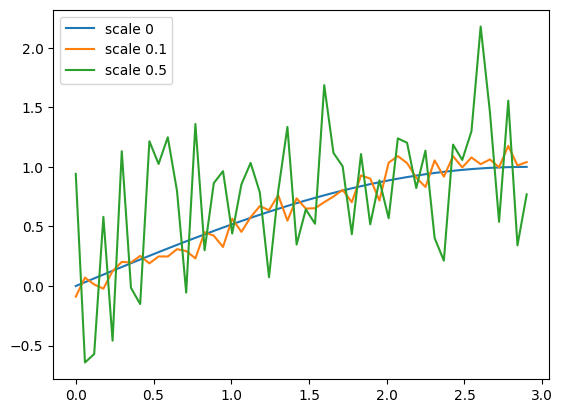

In [6]:
# Explicit seed to have reproducible testsets
np.random.seed(0)
ys2gauss_scales = [0.0, 0.1, 0.5]
ys2gauss = [ys2 + np.random.normal(scale=s, size=len(ys2)) for s in ys2gauss_scales]

for i, ysn in enumerate(ys2gauss):
    plt.plot(xs2, ysn, '-', label='scale %.2g' % ys2gauss_scales[i])
plt.legend(loc="best")

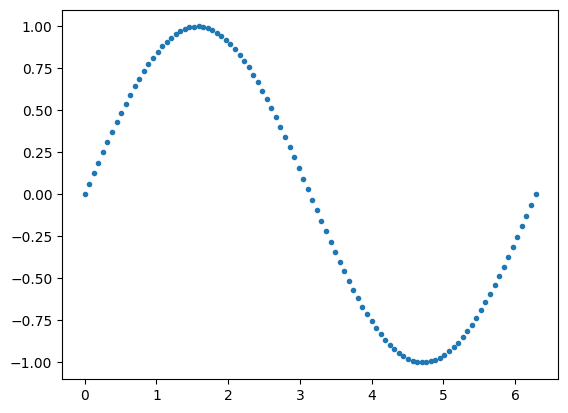

In [7]:
xsin = np.linspace(0, 2*np.pi, 100)
ysin = np.sin(xsin)

plt.plot(xsin, ysin, '.')

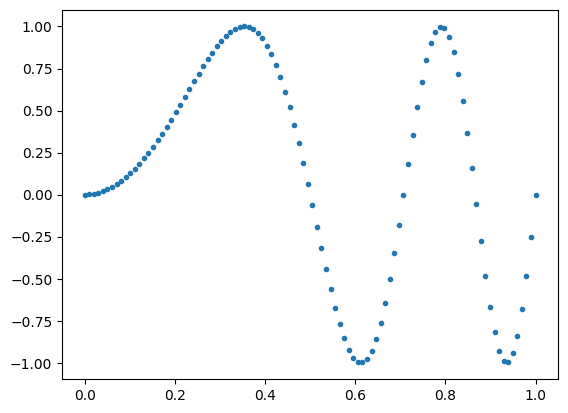

In [8]:
xsinvar = np.linspace(0, 1, 100)
ysinvar = np.sin(xsinvar**2 * 4 * np.pi)

plt.plot(xsinvar, ysinvar, '.')

# General stuff

In [9]:
color = ['green', 'cornflowerblue', 'chocolate', 'rebeccapurple', 'mediumvioletred']

# Optimizer performance - Approximation target only

In [12]:
learning_rate = 1.0
epochs = 5000
degree = 7
factor_approximation_quality = 1
factor_ck_pressure = 0
no_segments = 1
ck = 0

In [11]:
optimizers = ['SGD', 'Adagrad', 'Adadelta', 'RMSProp', 'Adam', 'Adamax', 'Nadam', 'AMSGrad', 'Adafactor', 'AdamW', 'FTRL', 'Lion']

In [9]:
kwargs = {'data_x': xs2, 'data_y': ys2, 'polynum': no_segments, 'ck': ck, 'degree': degree,
        'optimizer': 'SGD', 'n_epochs': epochs, 
        'basis': 'power', 'learning_rate': learning_rate , 'mode': 'optimizers',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure}

pool = mp.Pool(mp.cpu_count())
results = pool.starmap(parallel.job, zip(optimizers, repeat(kwargs)))

kwargs = {'data_x': xs2, 'data_y': ys2, 'polynum': no_segments, 'ck': ck, 'degree': degree,
        'optimizer': 'SGD', 'n_epochs': epochs, 
        'basis': 'chebyshev', 'learning_rate': learning_rate , 'mode': 'optimizers',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure}

pool = mp.Pool(mp.cpu_count())
results_chebyshev = pool.starmap(parallel.job, zip(optimizers, repeat(kwargs)))

In [10]:
# get total loss values of every entry
losses_plot1 = [0.0] * len(results)
losses_chebyshev_plot1 = [0.0] * len(results)

for i in range(len(results)):
    losses_plot1[i] = results[i][1]
    losses_chebyshev_plot1[i] = results_chebyshev[i][1]

%store losses_plot1
%store losses_chebyshev_plot1

Stored 'losses_plot1' (list)
Stored 'losses_chebyshev_plot1' (list)


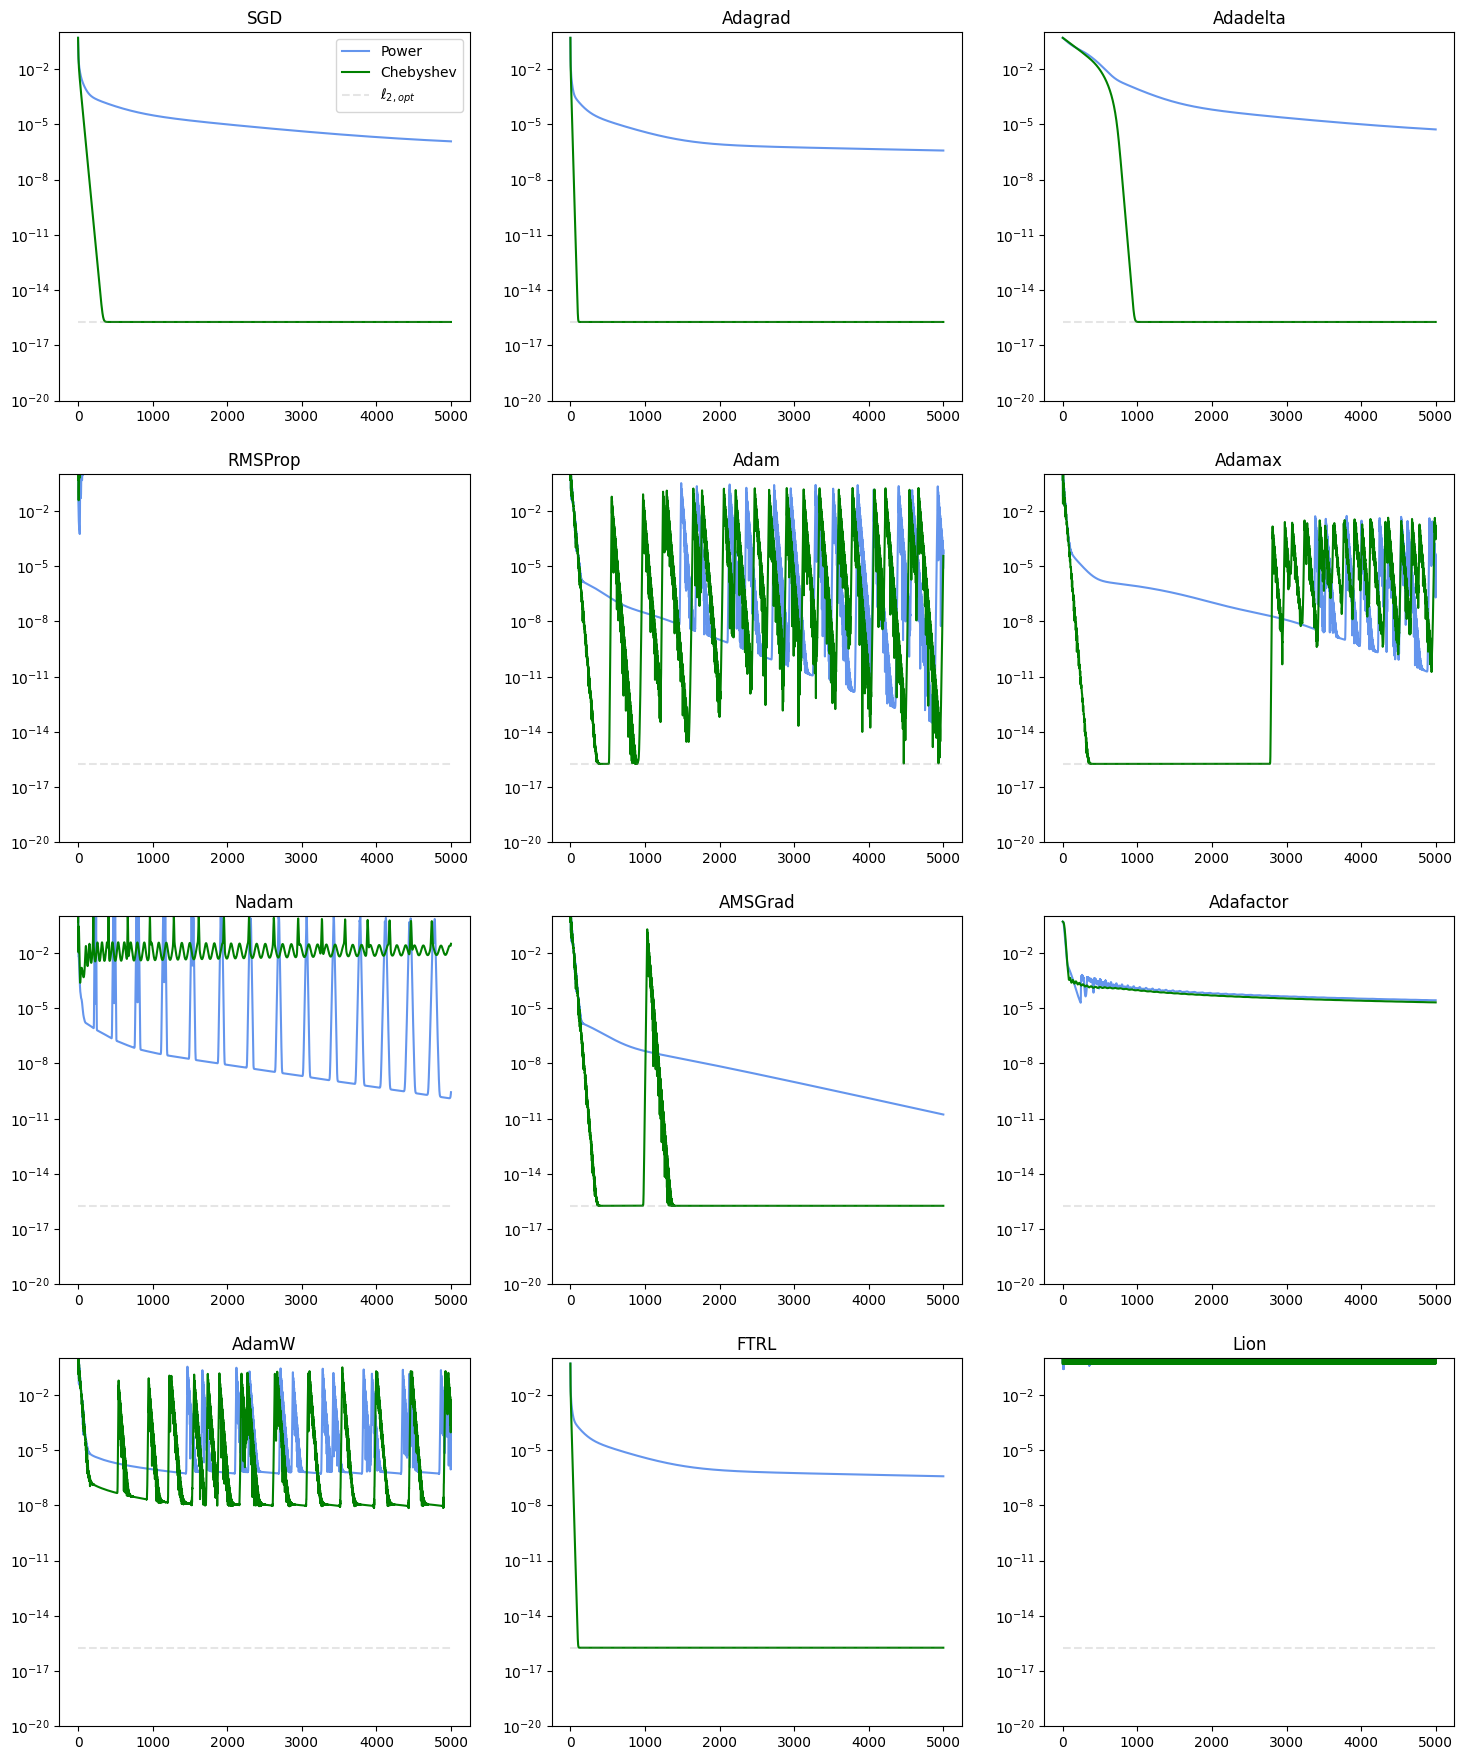

In [30]:
%store -r losses_plot1
%store -r losses_chebyshev_plot1

#fig, axes = plt.subplots(6, (len(optimizers)+2)//6) 
fig, axes = plt.subplots(4, (len(optimizers)+2)//4) 
axes = axes.flatten()
fig.set_figwidth(18)
fig.set_figheight(22)
#fig.suptitle(f'Losses over epochs with different optimizers with learning rate 1.0, Simple rise curve, {no_segments} segments')


spline = model.Spline(degree, no_segments, ck, 'chebyshev')
spline.fit(xs2, ys2, epochs=1)
optimum = plot.get_l2_baseline_error(spline, ck_loss = True, ck = ck)

for i, opt in enumerate(optimizers):
    ax = axes[i]

    ax.set_title("%s" % opt)

    ax.semilogy(losses_plot1[i], label="Power", color=color[1])
    ax.semilogy(losses_chebyshev_plot1[i], label="Chebyshev", color=color[0])
    ax.hlines(optimum[0], xmin=0, xmax=epochs, linestyle="--", alpha=0.2, label=r"$\ell_{2, opt}$", color='gray')
    ax.set_ylim([1e-20, 1e-0])

axes[0].legend(loc="best")
# axes[1].legend(loc="best")
# axes[2].legend(loc="best")
# axes[3].legend(loc="best")
# axes[4].legend(loc="best")
# axes[5].legend(loc="best")
# axes[6].legend(loc="best")
# axes[7].legend(loc="best")
# axes[8].legend(loc="center right")
# axes[9].legend(loc="center left")
# axes[10].legend(loc="best")
# axes[11].legend(loc="center right")

In [31]:
fig.savefig('C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\papers\\2024-lion18-ml-optimized-orthogonal-basis-pp\\figs\\optimizers_l2_only.eps', format='eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


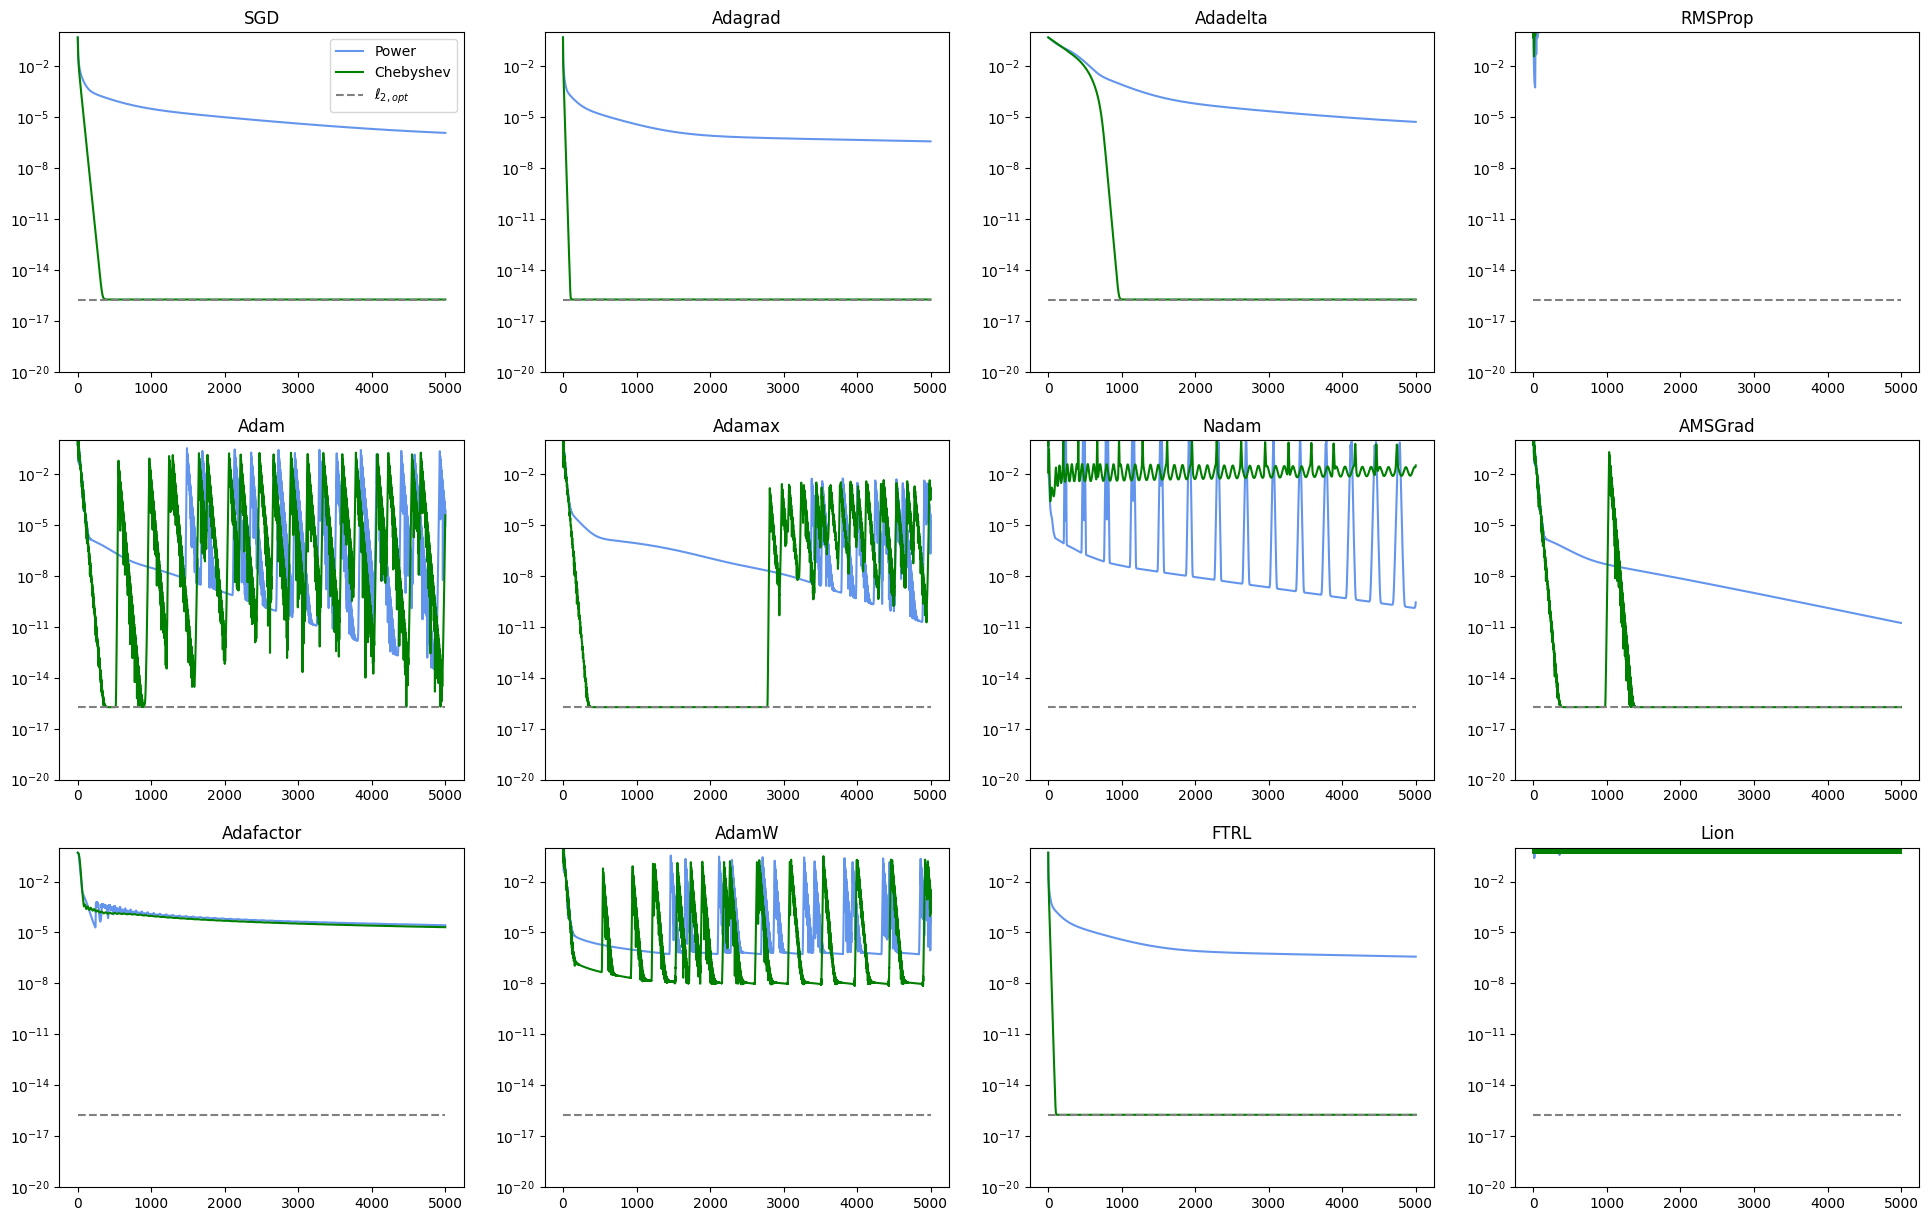

In [19]:
%store -r losses_plot1
%store -r losses_chebyshev_plot1

#fig, axes = plt.subplots(6, (len(optimizers)+2)//6) 
fig, axes = plt.subplots(3, (len(optimizers)+2)//3) 
axes = axes.flatten()
fig.set_figwidth(24)
fig.set_figheight(15)
#fig.suptitle(f'Losses over epochs with different optimizers with learning rate 1.0, Simple rise curve, {no_segments} segments')


spline = model.Spline(degree, no_segments, ck, 'chebyshev')
spline.fit(xs2, ys2, epochs=1)
optimum = plot.get_l2_baseline_error(spline, ck_loss = True, ck = ck)

for i, opt in enumerate(optimizers):
    ax = axes[i]

    ax.set_title("%s" % opt)

    ax.semilogy(losses_plot1[i], label="Power", color=color[1])
    ax.semilogy(losses_chebyshev_plot1[i], label="Chebyshev", color=color[0])
    ax.hlines(optimum[0], xmin=0, xmax=epochs, linestyle="--", label=r"$\ell_{2, opt}$", color='gray')
    ax.set_ylim([1e-20, 1e-0])

axes[0].legend(loc="best")
# axes[1].legend(loc="best")
# axes[2].legend(loc="best")
# axes[3].legend(loc="best")
# axes[4].legend(loc="best")
# axes[5].legend(loc="best")
# axes[6].legend(loc="best")
# axes[7].legend(loc="best")
# axes[8].legend(loc="center right")
# axes[9].legend(loc="center left")
# axes[10].legend(loc="best")
# axes[11].legend(loc="center right")

In [20]:
fig.savefig('C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\experiments\\experiments-chebyshev-legendre\\exports\\plots\\optimizers_l2.eps', format='eps', dpi=600, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Behaviour under noise - Approximation target only

The following 4 functions were taken from Stefan Huber's "polynomial.py", <stefan.huber@fh-salzburg.ac.at>.

In [24]:
def evaluate(coeffs, x):
    """Return evaluation of a polynomial with given coefficients at location x.
    If coeffs is [a, b, c, …] then return a + b·x + c·x² + …"""

    tot = 0.0
    for c in coeffs[::-1]:
        tot = x*tot + c
    return tot

def evaluate_vect(coeffs, xs):
    """Like a vectorized version of evaluate() for lists of values for x."""

    # We cannot use numpy.vectorize here because it would stop gradient
    # computation.
    # Note that tf.vectorize_map() is slow because len(xs) is too small
    # to pay off, I guess. Using map_fn() is similarily fast than using
    # plain list comprehension.
    return [evaluate(coeffs, x) for x in xs]

def l2_sq_error(coeffs, xs, ys):
    """Returns the square of the L2-error between polynomial of given coeffs
    and the samples given in ys at loctions xs. That is, if the polynomial
    given by coeffs is p then return the sum of the squares of p(x)-y where x,
    y iterates over xs, ys."""

    fs = evaluate_vect(coeffs, xs)
    ds = tf.subtract(fs, ys)
    return tf.reduce_sum(tf.multiply(ds, ds))

def l2_sq_loss(coeffs, xs, ys):
    """The squared L2 loss of given polynomial on given data points (xs, ys).␣
    ,→Loss is
    invariant on the length of xs."""
    return l2_sq_error(coeffs, xs, ys) / len(xs)

In [21]:
learning_rate = 1.0
epochs = 1000
degree = 7
factor_approximation_quality = 1
factor_ck_pressure = 0
no_segments = 1
ck = 0

In [75]:
kwargs = {'data_x': xs2, 'data_y': ys2, 'polynum': no_segments, 'ck': ck, 'continuity': False, 'degree': degree,
        'optimizer': 'AMSGrad', 'n_epochs': epochs, 
        'basis': 'power', 'learning_rate': learning_rate , 'mode': 'data_y',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure}

pool = mp.Pool(mp.cpu_count())
results_plot2 = pool.starmap(parallel.job, zip(ys2gauss, repeat(kwargs)))

kwargs = {'data_x': xs2, 'data_y': ys2, 'polynum': no_segments, 'ck': ck, 'continuity': False, 'degree': degree,
        'optimizer': 'AMSGrad', 'n_epochs': epochs, 'gradient_regularization': False,
        'basis': 'chebyshev', 'learning_rate': learning_rate , 'mode': 'data_y',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure}

pool = mp.Pool(mp.cpu_count())
results_chebyshev_plot2 = pool.starmap(parallel.job, zip(ys2gauss, repeat(kwargs)))

%store results_plot2
%store results_chebyshev_plot2

Stored 'results_plot2' (list)
Stored 'results_chebyshev_plot2' (list)


In [22]:
%store -r results_plot2
%store -r results_chebyshev_plot2

splines_plot2 = [0.0] * len(results_plot2)
splines_chebyshev_plot2 = [0.0] * len(results_plot2)

for i in range(len(results_plot2)):
    splines_plot2[i] = model.get_spline_from_coeffs(results_plot2[i][-1], xs2, ys2gauss[i], basis='power', ck=0, total_loss_values=results_plot2[i][1])
    splines_chebyshev_plot2[i] = model.get_spline_from_coeffs(results_chebyshev_plot2[i][-1], xs2, ys2gauss[i], basis='chebyshev', ck=0, total_loss_values=results_chebyshev_plot2[i][1])

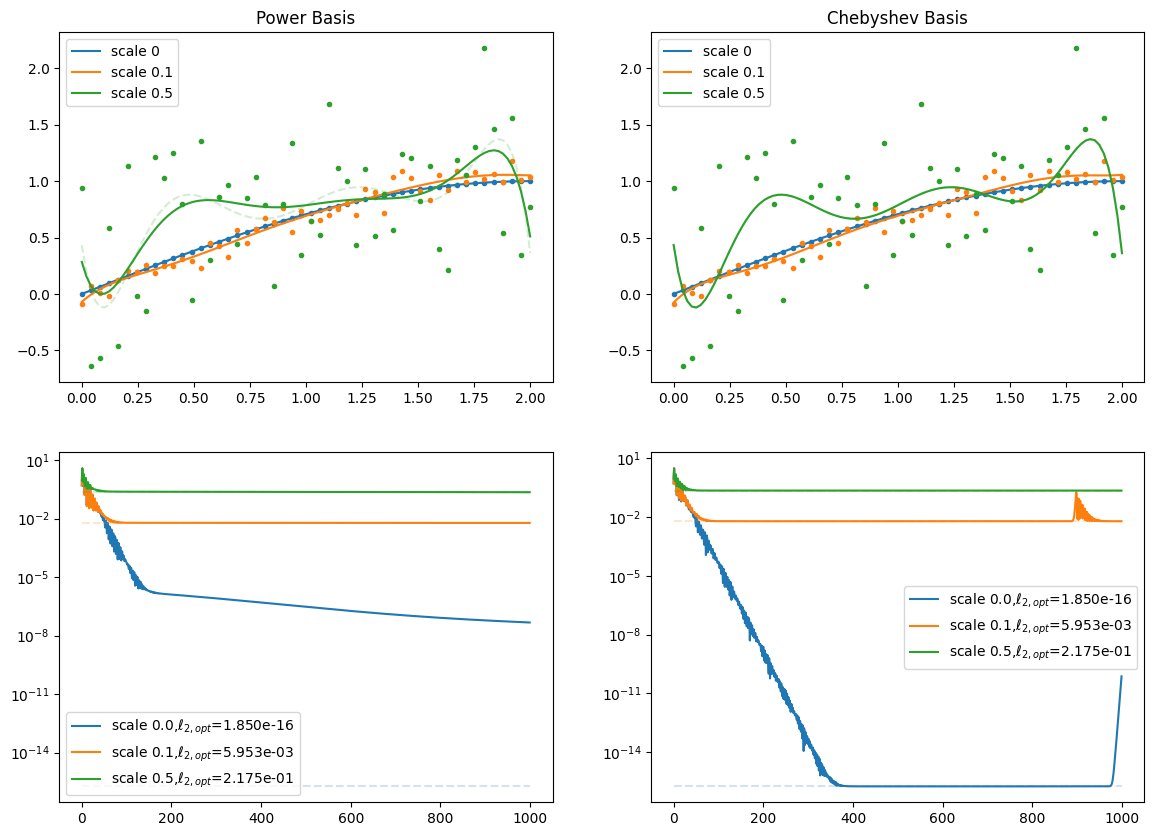

In [26]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(10)
#fig.suptitle("Result for different noise levels, AMSGrad")
colcycle = iter(mpl.rcParams['axes.prop_cycle'])

for i in range(len(splines_plot2)):
    col = next(colcycle)["color"]
    ps = splines_plot2[i].evaluate_spline_at_x(sampledata.rescale_input_data(xss, model.SEGMENT_SIZE_POWER))
    psc = splines_chebyshev_plot2[i].evaluate_spline_at_x(sampledata.rescale_input_data(xss, model.SEGMENT_SIZE_CHEBYSHEV))
    ysg = ys2gauss[i]
    scale = ys2gauss_scales[i]
    
    # Curves
    optcoeff = np.polyfit(sampledata.rescale_input_data(xs2, model.SEGMENT_SIZE_POWER), ys2gauss[i], degree)[::-1]
    psopt = [evaluate(optcoeff, x) for x in sampledata.rescale_input_data(xss, model.SEGMENT_SIZE_POWER)]
    optloss = l2_sq_loss(optcoeff, sampledata.rescale_input_data(xs2, model.SEGMENT_SIZE_POWER), ysg)
        
    axes[0][0].plot(sampledata.rescale_input_data(xs2, model.SEGMENT_SIZE_POWER), ysg, '.', c=col)
    axes[0][0].plot(sampledata.rescale_input_data(xss, model.SEGMENT_SIZE_POWER), ps, label="scale %.2g" % scale, c=col)
    axes[0][0].plot(sampledata.rescale_input_data(xss, model.SEGMENT_SIZE_POWER), psopt, c=col, linestyle="--", alpha=0.2) 
 
    optcoeff = np.polyfit(sampledata.rescale_input_data(xs2, model.SEGMENT_SIZE_CHEBYSHEV), ys2gauss[i], degree)[::-1]
    psopt = [evaluate(optcoeff, x) for x in sampledata.rescale_input_data(xss, model.SEGMENT_SIZE_CHEBYSHEV)]
    optloss = l2_sq_loss(optcoeff, sampledata.rescale_input_data(xs2, model.SEGMENT_SIZE_CHEBYSHEV), ysg)
    
    axes[0][1].plot(sampledata.rescale_input_data(xs2, model.SEGMENT_SIZE_CHEBYSHEV), ysg, '.', c=col)
    axes[0][1].plot(sampledata.rescale_input_data(xss, model.SEGMENT_SIZE_CHEBYSHEV), psc, label="scale %.2g" % scale, c=col)
    axes[0][1].plot(sampledata.rescale_input_data(xss, model.SEGMENT_SIZE_CHEBYSHEV), psopt, c=col, linestyle="--", alpha=0.2) 

    # Losses
    axes[1][0].semilogy(splines_plot2[i].total_loss_values, label=f"scale {scale}," + r"$\ell_{2, opt}$" + f"={optloss:.{3}e}", c=col)
    axes[1][0].hlines(optloss, xmin=0, xmax=epochs, linestyle="--", color=col, alpha=0.2)  

    axes[1][1].semilogy(splines_chebyshev_plot2[i].total_loss_values, label=f"scale {scale}," + r"$\ell_{2, opt}$" + f"={optloss:.{3}e}", c=col)
    axes[1][1].hlines(optloss, xmin=0, xmax=epochs, linestyle="--", color=col, alpha=0.2)  
    
axes[0][0].set_title("Power Basis")
axes[0][1].set_title("Chebyshev Basis")

axes[0][0].legend(loc="best")
axes[0][1].legend(loc="best")
axes[1][0].legend(loc="lower left")
axes[1][1].legend(loc="best")

In [28]:
fig.savefig('C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\papers\\2024-lion18-ml-optimized-orthogonal-basis-pp\\figs\\noise_l2_only.eps', format='eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Optimizer performance - Combined approximation and $C^k$-continuity optimization target

In [22]:
learning_rate = 0.1
epochs = 5000
alpha = 0.1
factor_approximation_quality = 1-alpha
factor_ck_pressure = alpha
no_segments = 2
ck = 3
data_x = xs2
data_y = ys2

In [14]:
kwargs = {'data_x': data_x, 'data_y': data_y, 'polynum': no_segments, 'ck': ck, 'degree': degree,
        'n_epochs': epochs, 'learning_rate': learning_rate , 'mode': 'optimizers',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure,
        'ck_regularization': True, 'basis': 'power'}

pool = mp.Pool(mp.cpu_count())
results_with = pool.starmap(parallel.job, zip(optimizers, repeat(kwargs)))

kwargs = {'data_x': data_x, 'data_y': data_y, 'polynum': no_segments, 'ck': ck, 'degree': degree,
        'n_epochs': epochs, 'learning_rate': learning_rate , 'mode': 'optimizers',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure,
        'ck_regularization': False, 'basis': 'power'}

pool = mp.Pool(mp.cpu_count())
results_without = pool.starmap(parallel.job, zip(optimizers, repeat(kwargs)))

kwargs = {'data_x': data_x, 'data_y': data_y, 'polynum': no_segments, 'ck': ck, 'degree': degree,
        'n_epochs': epochs, 'learning_rate': learning_rate , 'mode': 'optimizers',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure,
        'ck_regularization': True, 'basis': 'chebyshev'}

pool = mp.Pool(mp.cpu_count())
results_chebyshev_with = pool.starmap(parallel.job, zip(optimizers, repeat(kwargs)))

kwargs = {'data_x': data_x, 'data_y': data_y, 'polynum': no_segments, 'ck': ck, 'degree': degree,
        'n_epochs': epochs, 'learning_rate': learning_rate , 'mode': 'optimizers',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure,
        'ck_regularization': False, 'basis': 'chebyshev'}

pool = mp.Pool(mp.cpu_count())
results_chebyshev_without = pool.starmap(parallel.job, zip(optimizers, repeat(kwargs)))

# get total loss values of every entry
losses_with = [0.0] * len(results_with)
losses_without = [0.0] * len(results_without)
losses_chebyshev_with = [0.0] * len(results_chebyshev_with)
losses_chebyshev_without = [0.0] * len(results_chebyshev_without)

for i in range(len(results_with)):
    losses_with[i] = results_with[i][1]
    losses_without[i] = results_without[i][1]
    losses_chebyshev_with[i] = results_chebyshev_with[i][1]
    losses_chebyshev_without[i] = results_chebyshev_without[i][1]

In [15]:
losses_with_plot_3 = copy.deepcopy(losses_with)
%store losses_with_plot_3
losses_without_plot_3 = copy.deepcopy(losses_without)
%store losses_without_plot_3
losses_chebyshev_with_plot_3 = copy.deepcopy(losses_chebyshev_with)
%store losses_chebyshev_with_plot_3
losses_chebyshev_without_plot_3 = copy.deepcopy(losses_chebyshev_without)
%store losses_chebyshev_without_plot_3

Stored 'losses_with_plot_3' (list)
Stored 'losses_without_plot_3' (list)
Stored 'losses_chebyshev_with_plot_3' (list)
Stored 'losses_chebyshev_without_plot_3' (list)


In [1]:
%store -r losses_with_plot_3
%store -r losses_without_plot_3
%store -r losses_chebyshev_with_plot_3
%store -r losses_chebyshev_without_plot_3

C:\Users\Hannes Waclawek\Documents\FH Git Repos\venvs\experiments-chebyshev-legendre\lib\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


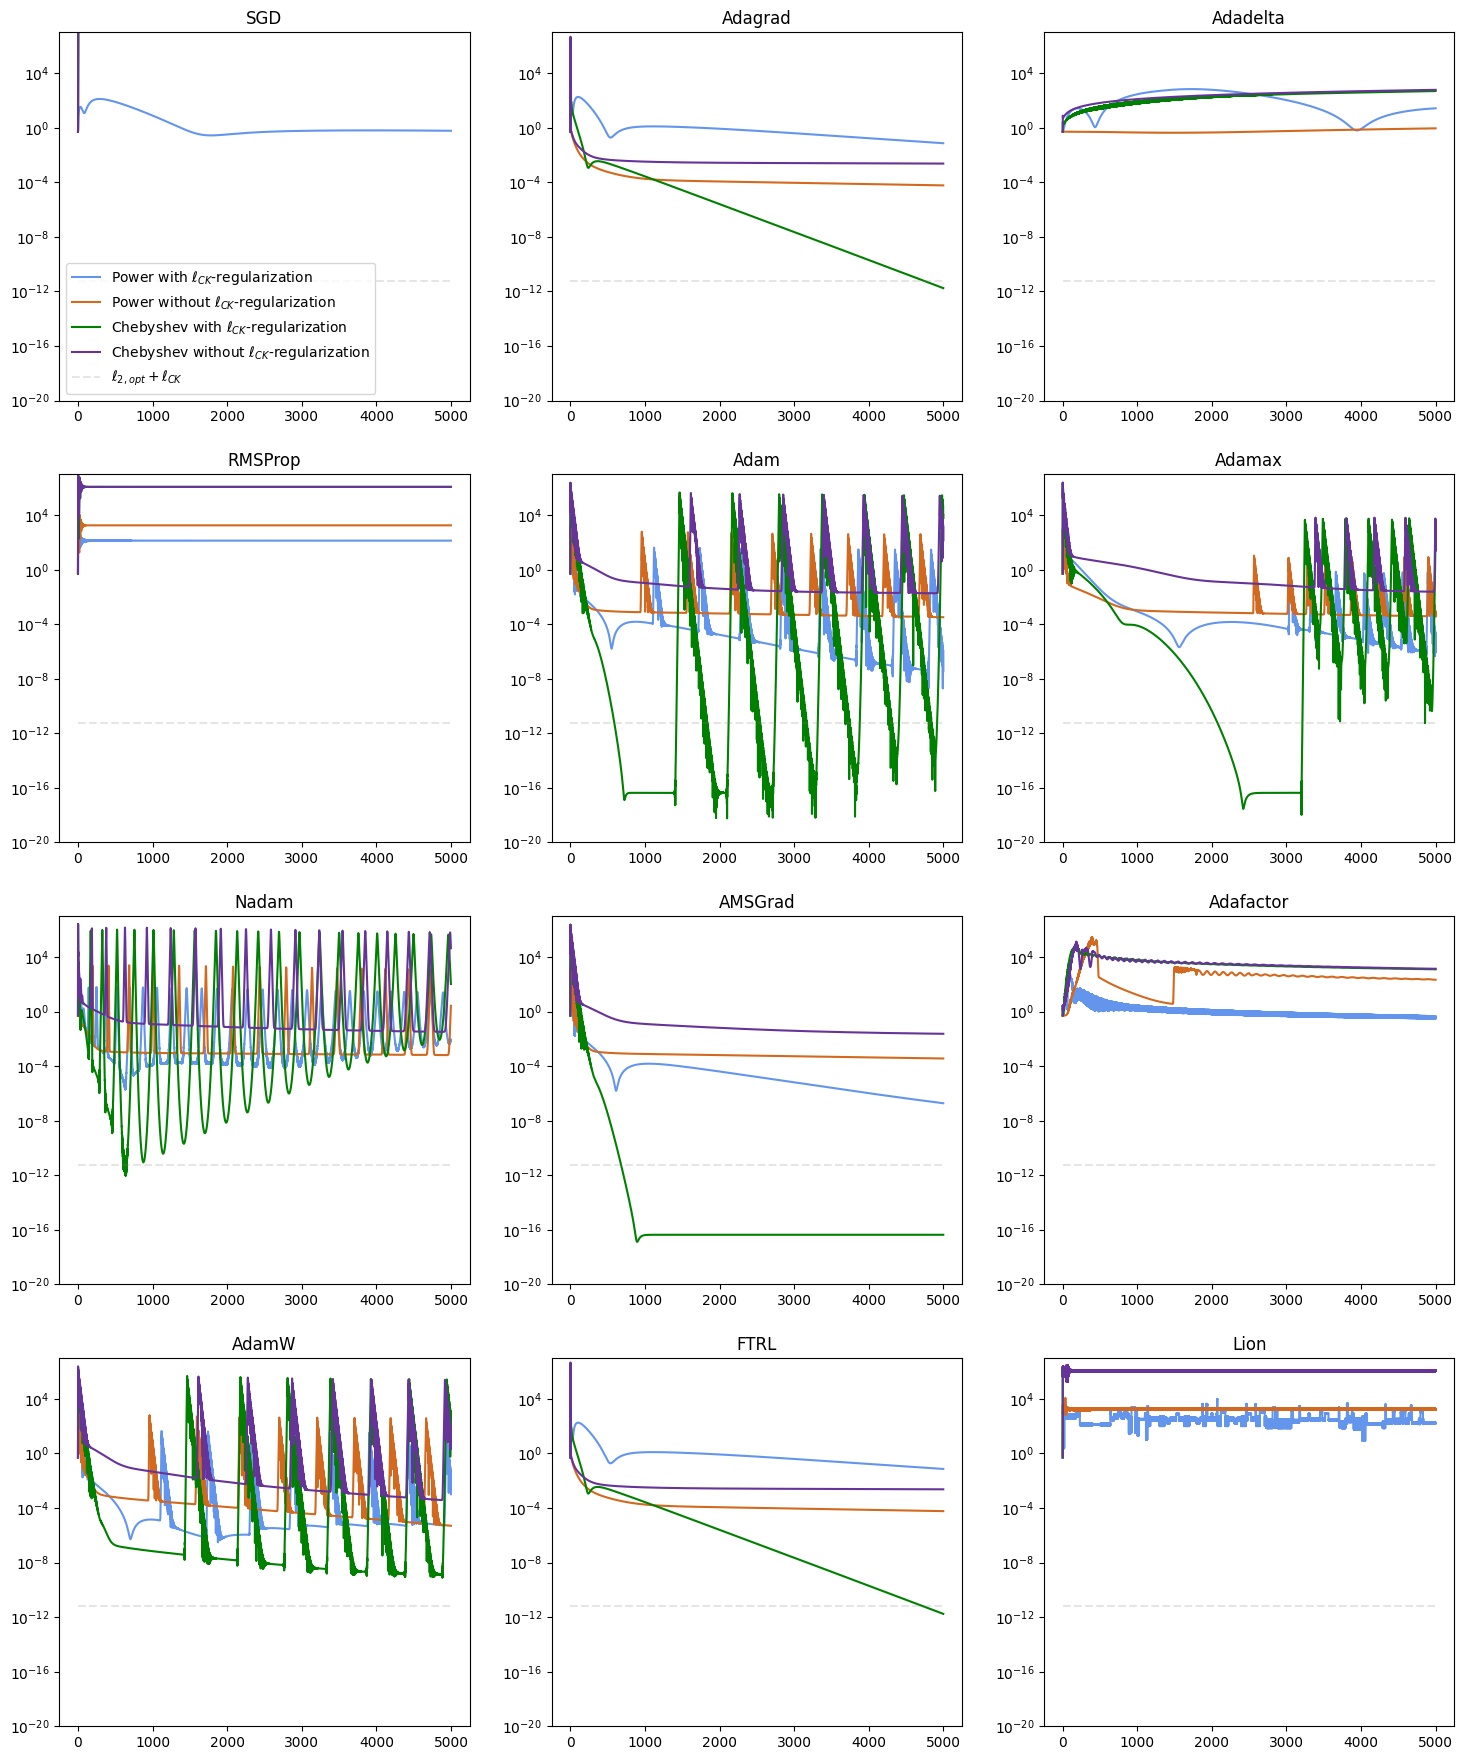

In [14]:
#fig, axes = plt.subplots(6, (len(optimizers)+2)//6) 
fig, axes = plt.subplots(4, (len(optimizers)+2)//4) 
axes = axes.flatten()
fig.set_figwidth(18)
fig.set_figheight(22)
#fig.suptitle(f'Losses over epochs with different optimizers with learning rate {learning_rate}, degree {degree}, C^{ck}, alpha = {alpha}, Simple rise input curve, {no_segments} segments')

spline = model.Spline(degree, no_segments, ck, 'chebyshev')
spline.fit(data_x, data_y, epochs=1)
opt = plot.get_l2_baseline_error(spline, ck_loss = True, ck = ck)
optloss = opt[0]+opt[1]

for i, opt in enumerate(optimizers):
    ax = axes[i]

    ax.set_title("%s" % opt)

    ax.semilogy(losses_with_plot_3[i], label=r"Power with $\ell_{CK}$-regularization", color=color[1])
    ax.semilogy(losses_without_plot_3[i], label="Power without $\ell_{CK}$-regularization", color=color[2])
    ax.semilogy(losses_chebyshev_with_plot_3[i], label="Chebyshev with $\ell_{CK}$-regularization", color=color[0])
    ax.semilogy(losses_chebyshev_without_plot_3[i], label="Chebyshev without $\ell_{CK}$-regularization", color=color[3])
    ax.hlines(optloss, xmin=0, xmax=epochs, color='gray', linestyle="--", alpha=0.2, label=r"$\ell_{2, opt} + \ell_{CK}$")
    ax.set_ylim([1e-20, 1e7])
    
axes[0].legend(loc="best")

In [15]:
fig.savefig('C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\papers\\2024-lion18-ml-optimized-orthogonal-basis-pp\\figs\\optimizers.eps', format='eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


c:\Users\Hannes Waclawek\Documents\FH Git Repos\venvs\experiments-chebyshev-legendre\lib\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


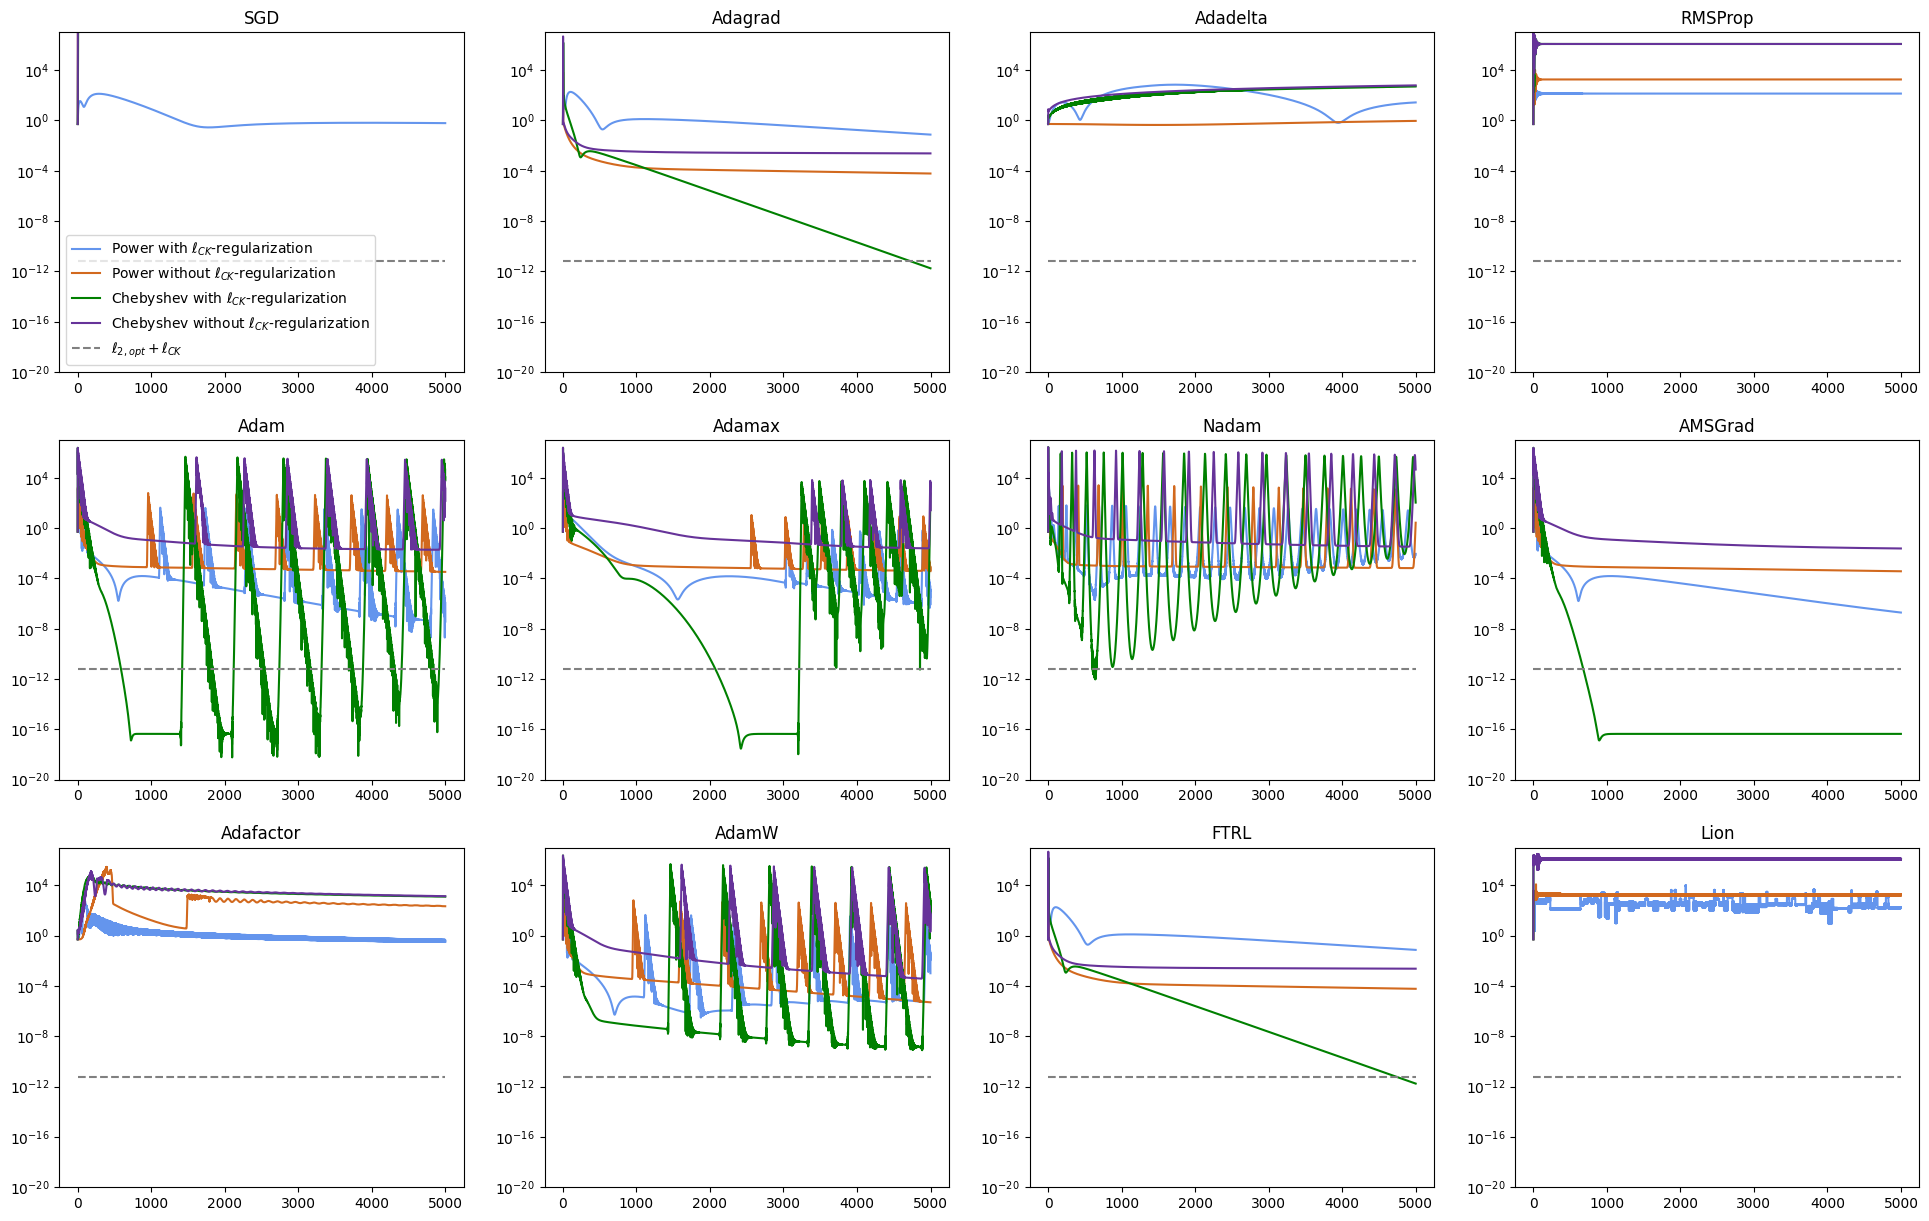

In [24]:
fig, axes = plt.subplots(3, (len(optimizers)+2)//3) 
#fig, axes = plt.subplots(4, (len(optimizers)+2)//4) 
axes = axes.flatten()
fig.set_figwidth(24)
fig.set_figheight(15)
#fig.suptitle(f'Losses over epochs with different optimizers with learning rate {learning_rate}, degree {degree}, C^{ck}, alpha = {alpha}, Simple rise input curve, {no_segments} segments')

spline = model.Spline(degree, no_segments, ck, 'chebyshev')
spline.fit(data_x, data_y, epochs=1)
opt = plot.get_l2_baseline_error(spline, ck_loss = True, ck = ck)
optloss = opt[0]+opt[1]

for i, opt in enumerate(optimizers):
    ax = axes[i]

    ax.set_title("%s" % opt)

    ax.semilogy(losses_with_plot_3[i], label=r"Power with $\ell_{CK}$-regularization", color=color[1])
    ax.semilogy(losses_without_plot_3[i], label="Power without $\ell_{CK}$-regularization", color=color[2])
    ax.semilogy(losses_chebyshev_with_plot_3[i], label="Chebyshev with $\ell_{CK}$-regularization", color=color[0])
    ax.semilogy(losses_chebyshev_without_plot_3[i], label="Chebyshev without $\ell_{CK}$-regularization", color=color[3])
    ax.hlines(optloss, xmin=0, xmax=epochs, color='gray', linestyle="--", label=r"$\ell_{2, opt} + \ell_{CK}$")
    ax.set_ylim([1e-20, 1e7])
    
axes[0].legend(loc="best")

In [25]:
fig.savefig('C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\experiments\\experiments-chebyshev-legendre\\exports\\plots\\optimizers.eps', format='eps', dpi=600, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


### Behaviour under noise

In [14]:
# We increase alpha with rising variance as this requires more emphasis on continuity optimization
lambdas = [0.1, 0.4, 0.9]
args = [(ys2gauss[i], lambdas[i]) for i in range(len(lambdas))]
epochs = 2000
no_segments = 2

In [27]:
kwargs = {'data_x': xs2, 'data_y': ysinvar, 'polynum': no_segments, 'ck': ck, 'degree': degree,
        'optimizer': 'AMSGrad', 'n_epochs': epochs, 
        'basis': 'power', 'learning_rate': learning_rate, 'mode': 'data_y_and_lambda',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure}

pool = mp.Pool(mp.cpu_count())
results_plot4 = pool.starmap(parallel.job, zip(args, repeat(kwargs)))

kwargs = {'data_x': xs2, 'data_y': ysinvar, 'polynum': no_segments, 'ck': ck, 'degree': degree,
        'optimizer': 'AMSGrad', 'n_epochs': epochs,
        'basis': 'chebyshev', 'learning_rate': learning_rate, 'mode': 'data_y_and_lambda',
        'factor_approximation_quality': factor_approximation_quality, 'factor_ck_pressure': factor_ck_pressure}

pool = mp.Pool(mp.cpu_count())
results_chebyshev_plot4 = pool.starmap(parallel.job, zip(args, repeat(kwargs)))

%store results_plot4
%store results_chebyshev_plot4

Stored 'results_plot4' (list)
Stored 'results_chebyshev_plot4' (list)


In [98]:
%store -r results_plot4
%store -r results_chebyshev_plot4
splines = [0.0] * len(results_plot4)
splines_chebyshev = [0.0] * len(results_plot4)
splines_shifted_chebyshev = [0.0] * len(results_plot4)

for i in range(len(results_plot4)):
    splines[i] = model.get_spline_from_coeffs(results_plot4[i][-1], xs2, ys2gauss[i], basis='power', ck=ck, total_loss_values=results_plot4[i][1], D_loss_values=results_plot4[i][3])
    splines_chebyshev[i] = model.get_spline_from_coeffs(results_chebyshev_plot4[i][-1], xs2, ys2gauss[i], basis='chebyshev', ck=ck, total_loss_values=results_chebyshev_plot4[i][1], D_loss_values=results_chebyshev_plot4[i][3])

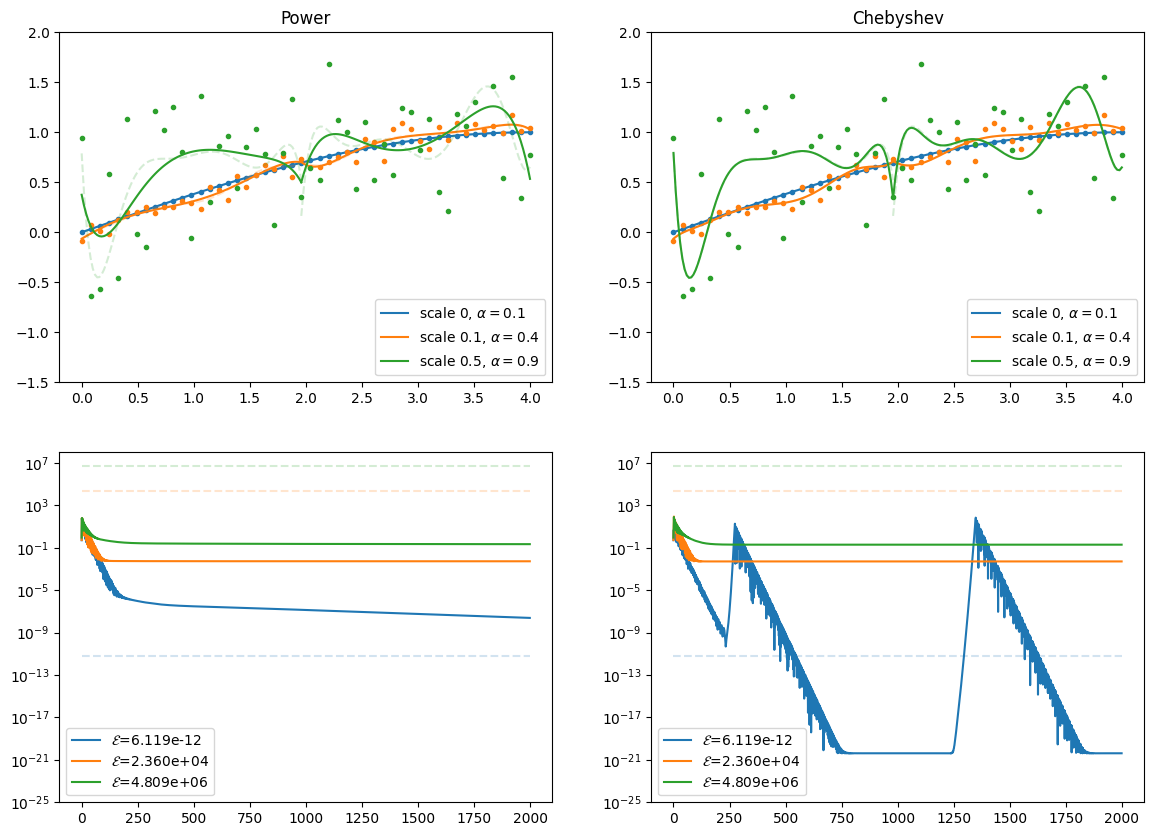

In [115]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(10)
#fig.suptitle(f'Derivative 0 plot for different noise levels, Simple rise input, {no_segments} segments, learning rate = {learning_rate}, {epochs} epochs, C^{ck}-continuity')
colcycle = iter(mpl.rcParams['axes.prop_cycle'])

optloss = [0.0] * len(splines)

for i in range(len(splines)):
    ax1 = axes[0][0]
    ax2 = axes[0][1]
    col = next(colcycle)["color"]
    ysg = ys2gauss[i]
    scale = ys2gauss_scales[i]

    plot.plot_spline(splines[i], label=f'scale {scale:.2g}, ' + r'$\alpha =$' + f'{lambdas[i]}', segment_coloring=False, color=col, ax=ax1, plot_input=False)
    plot.plot_l2optimum(splines[i], deriv=0, color=col, plot_input=True, ax=ax1)
    plot.plot_l2optimum(splines[i], deriv=0, color=col, plot_input=True, ax=ax2)
    plot.plot_spline(splines_chebyshev[i], label=f'scale {scale:.2g}, ' + r'$\alpha =$' + f'{lambdas[i]}', segment_coloring=False, color=col, ax=ax2, plot_input=False)
    #optloss_power[i] = plot.plot_l2optimum(splines[i], lambd=lambdas[i], color=col, plot_input=True, ax=ax1)
    opt = plot.get_l2_baseline_error(splines[i], ck_loss = True, ck = ck)
    optloss[i] = opt[0]+opt[1]

    ax3 = axes[1][0]
    ax4 = axes[1][1]   
    ysg = ys2gauss[i]
    scale = ys2gauss_scales[i]

    ax3.semilogy(splines[i].total_loss_values, label=r'$\mathcal{E}$' + f'={optloss[i]:.{3}e}', c=col)
    ax3.hlines(optloss[i], xmin=0, xmax=epochs, linestyle="--", color=col, alpha=0.2)  
    
    ax4.semilogy(splines_chebyshev[i].total_loss_values, label=r'$\mathcal{E}$' + f'={optloss[i]:.{3}e}', c=col)
    ax4.hlines(optloss[i], xmin=0, xmax=epochs, linestyle="--", color=col, alpha=0.2)

axes[0][0].set_title("Power")
axes[0][0].set_ylim([-1.5, 2])
axes[0][1].set_title("Chebyshev")
axes[0][1].set_ylim([-1.5, 2])
axes[0][0].legend(loc="lower right")
axes[0][1].legend(loc="lower right")
axes[1][0].set_ylim([1e-25, 1e8])
axes[1][1].set_ylim([1e-25, 1e8])
axes[1][0].legend(loc="lower left")
axes[1][1].legend(loc="lower left")

In [116]:
fig.savefig('C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\papers\\2024-paperdraft-ml-optimized-spline-orthogonal-basis\\figs\\noise.eps', format='eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# $\ell_{CK}$ over $\ell_2$


In [8]:
params1 = np.arange(0, 0.5, 0.05)
params2 = np.arange(0, 1, 0.2)
params2 = np.append(params2, 0.85)
params2 = np.append(params2, 0.9)
params2 = np.append(params2, 0.95)
params2 = np.append(params2, 0.99)
params2 = np.append(params2, 0.999)

learning_rate = 0.1
early_stopping = True
patience = 500
polynum = 2
epochs = 2000
alpha = 0.1
ck_regularization = True
ck = 3

colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = plt.get_cmap('gist_rainbow')

In [108]:
data_x = xs2
data_y = ys2

kwargs = {'data_x': data_x, 'data_y': data_y, 'polynum': polynum, 'ck': ck, 'degree': degree,
    'optimizer': 'AmsGrad', 'n_epochs': epochs, 'basis': 'chebyshev', 'learning_rate': learning_rate, 
    'ck_regularization': ck_regularization, 'factor_ck_pressure':alpha, 'factor_approximation_quality':1-alpha, 'mode': 'lambda',
    'early_stopping': early_stopping, 'patience': patience, 'initialization': 'l2'}

pool = mp.Pool(mp.cpu_count())
results_plot6 = pool.starmap(parallel.job, zip(params1, repeat(kwargs)))
%store results_plot6

kwargs = {'data_x': data_x, 'data_y': data_y, 'polynum': polynum, 'ck': ck, 'degree': degree,
    'optimizer': 'AmsGrad', 'n_epochs': epochs, 'basis': 'chebyshev', 'learning_rate': learning_rate, 
    'ck_regularization': ck_regularization, 'factor_ck_pressure':alpha, 'factor_approximation_quality':1-alpha, 'mode': 'lambda_enforced_continuity',
    'early_stopping': early_stopping, 'patience': patience, 'initialization': 'l2'}

pool = mp.Pool(mp.cpu_count())
results_plot6_enforced = pool.starmap(parallel.job, zip(params1, repeat(kwargs)))
%store results_plot6_enforced

Stored 'results_plot6' (list)
Stored 'results_plot6_enforced' (list)


In [101]:
data_x = xs2
data_y = ys2gauss[2]

kwargs = {'data_x': data_x, 'data_y': data_y, 'polynum': polynum, 'ck': ck, 'degree': degree,
    'optimizer': 'AmsGrad', 'n_epochs': epochs, 'basis': 'chebyshev', 'learning_rate': learning_rate, 
    'ck_regularization': ck_regularization, 'factor_ck_pressure':alpha, 'factor_approximation_quality':1-alpha, 'mode': 'lambda',
    'early_stopping': early_stopping, 'patience': patience, 'initialization': 'l2'}

pool = mp.Pool(mp.cpu_count())
results_plot6_var = pool.starmap(parallel.job, zip(params2, repeat(kwargs)))
%store results_plot6_var

kwargs = {'data_x': data_x, 'data_y': data_y, 'polynum': polynum, 'ck': ck, 'degree': degree,
    'optimizer': 'AmsGrad', 'n_epochs': epochs, 'basis': 'chebyshev', 'learning_rate': learning_rate, 
    'ck_regularization': ck_regularization, 'factor_ck_pressure':alpha, 'factor_approximation_quality':1-alpha, 'mode': 'lambda_enforced_continuity',
    'early_stopping': early_stopping, 'patience': patience, 'initialization': 'l2'}

pool = mp.Pool(mp.cpu_count())
results_plot6_enforced_var = pool.starmap(parallel.job, zip(params2, repeat(kwargs)))
%store results_plot6_enforced_var

Stored 'results_plot6_var' (list)
Stored 'results_plot6_enforced_var' (list)


In [16]:
def plot_figure6_axis(results, ax, xlim, ylim, params, data_x, data_y):
    splines_results = [0.0] * len(results)
    
    for i in range(len(results)):
        splines_results[i] = model.get_spline_from_coeffs(results[i][-1], data_x, data_y, basis='chebyshev', ck=ck, total_loss_values=copy.copy(results[i][1]), e_loss_values=copy.copy(results[i][2]), D_loss_values=copy.copy(results[i][3]))
    
    #ax.set_prop_cycle(color=[color_map(1.*i/len(params)) for i in range(len(params))])
    mycolor = lambda i: color_map(1.*i/len(params))
    
    for i in range(len(params)):
        ax.loglog(results[i][2], results[i][3], label=r'$\alpha =$' +f'{params[i]:.{3}f}', color=mycolor(i), alpha=0.5)
        ax.plot(results[i][2][-1], results[i][3][-1], '*', color=mycolor(i))
    
    baseline_loss = plot.get_l2_baseline_error(splines_results[1], ck_loss=True, ck=ck)
    ax.axvline(baseline_loss[0], linestyle="--", color=colors[0], label=r'$\ell_2^*$')
    ax.plot(baseline_loss[0], baseline_loss[1].numpy(), marker='x', color=colors[0], markersize=10)
    
    l2coeffs = plot.get_l2_baseline_coeffs(splines_results[1])
    continuous_l2_result = model.get_spline_from_numpy_coeffs(l2coeffs, splines_results[1].data_x, splines_results[1].data_y, ck=ck)
    continuous_l2_result._establish_continuity()
    continuous_l2_result._append_current_losses()
    ax.axvline(continuous_l2_result.e_loss_values[-1], linestyle="--", color=colors[1], label=r'$\widetilde{\ell_2^*}$')
    #ax.plot(continuous_l2_result._sum_squared_errors(), alpha*continuous_l2_result.ck_pressure()[-1], marker='*', color=colors[0], markersize=10)
    
    ax.legend(loc='best')
    ax.set_xlabel('$\ell_2$', fontsize=15)
    ax.set_ylabel('$\ell_{CK}$', fontsize=15)
    ax.grid(which='both', axis='x')
    ax.grid(axis='y')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

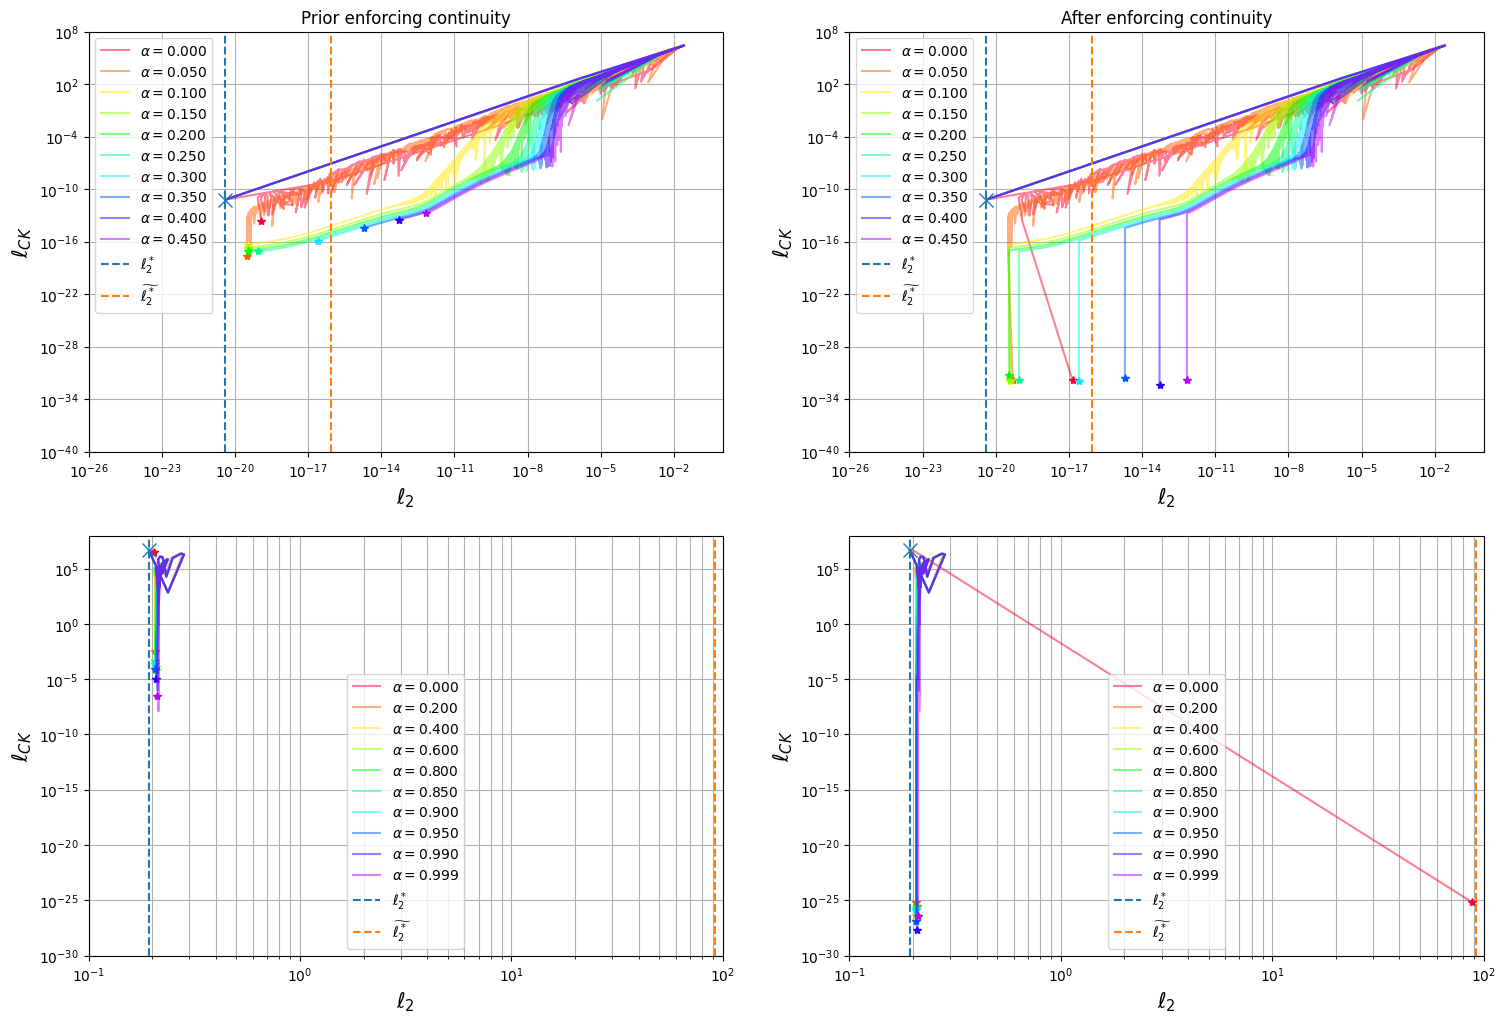

In [17]:
%store -r results_plot6
%store -r results_plot6_enforced
%store -r results_plot6_var
%store -r results_plot6_enforced_var

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(18)
fig.set_figheight(12)
#fig.suptitle(f'Chebyshev basis & AMSGrad: Continuity over Approximation error for different random initializations, C^{ck}, degree {degree}, {epochs} epochs, {polynum} segments, Early stopping = {early_stopping}')
plot_figure6_axis(results_plot6, axes[0][0], xlim=(1e-26,1e-0), ylim=(1e-40,1e8), params=params1, data_x=xs2, data_y=ys2)
plot_figure6_axis(results_plot6_enforced, axes[0][1], xlim=(1e-26,1e-0), ylim=(1e-40,1e8), params=params1, data_x=xs2, data_y=ys2)
plot_figure6_axis(results_plot6_var, axes[1][0], xlim=(1e-1,1e2), ylim=(1e-30,1e8), params=params2, data_x=xs2, data_y=ys2gauss[2])
plot_figure6_axis(results_plot6_enforced_var, axes[1][1], xlim=(1e-1,1e2), ylim=(1e-30,1e8), params=params2, data_x=xs2, data_y=ys2gauss[2])
axes[0][0].set_title("Prior enforcing continuity")
axes[0][1].set_title("After enforcing continuity")
axes[1][1].legend(loc='lower center')

In [18]:
fig.savefig('C:\\Users\\Hannes Waclawek\\Documents\\FH Git Repos\\papers\\2024-paperdraft-ml-optimized-spline-orthogonal-basis\\figs\\lckoverl2.eps', format='eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Naive losses for datasets

In [145]:
spline = model.Spline(7, 2, 3, 'chebyshev')
spline.fit(xs2, ys2, epochs=1)
opt = plot.get_l2_baseline_error(spline, ck_loss = True, ck = 3)
opt[0]

<tf.Tensor: shape=(), dtype=float64, numpy=4.107478909648184e-21>

In [146]:
opt[0] + opt[1]

<tf.Tensor: shape=(), dtype=float64, numpy=6.119217348836858e-12>

In [147]:
l2coeffs = plot.get_l2_baseline_coeffs(spline)
continuous_l2_result = model.get_spline_from_numpy_coeffs(l2coeffs, spline.data_x, spline.data_y, ck=3)
continuous_l2_result._establish_continuity()
continuous_l2_result._append_current_losses()
continuous_l2_result.e_loss_values[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=8.44816584227226e-17>

In [148]:
continuous_l2_result.total_loss_values[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=8.44816584227226e-17>

In [149]:
spline = model.Spline(7, 2, 3, 'chebyshev')
spline.fit(xsin, ysin, epochs=1)
opt = plot.get_l2_baseline_error(spline, ck_loss = True, ck = 3)
opt[0]

Early stop: Achieved best result after 243 epochs. Exiting.


<tf.Tensor: shape=(), dtype=float64, numpy=2.2356554130726495e-11>

In [150]:
opt[0] + opt[1]

<tf.Tensor: shape=(), dtype=float64, numpy=0.00048211997069352386>

In [151]:
l2coeffs = plot.get_l2_baseline_coeffs(spline)
continuous_l2_result = model.get_spline_from_numpy_coeffs(l2coeffs, spline.data_x, spline.data_y, ck=3)
continuous_l2_result._establish_continuity()
continuous_l2_result._append_current_losses()
continuous_l2_result.e_loss_values[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=3.627821253770763e-07>

In [152]:
continuous_l2_result.total_loss_values[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=3.627821253770763e-07>

In [153]:
spline = model.Spline(7, 3, 3, 'chebyshev')
spline.fit(xsinvar, ysinvar, epochs=1)
opt = plot.get_l2_baseline_error(spline, ck_loss = True, ck = 3)
opt[0]

Early stop: Achieved best result after 144 epochs. Exiting.


<tf.Tensor: shape=(), dtype=float64, numpy=3.536260296426396e-06>

In [154]:
opt[0] + opt[1]

<tf.Tensor: shape=(), dtype=float64, numpy=1581.9554722425949>

In [155]:
l2coeffs = plot.get_l2_baseline_coeffs(spline)
continuous_l2_result = model.get_spline_from_numpy_coeffs(l2coeffs, spline.data_x, spline.data_y, ck=3)
continuous_l2_result._establish_continuity()
continuous_l2_result._append_current_losses()
continuous_l2_result.e_loss_values[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=0.0423332949670662>

In [156]:
continuous_l2_result.total_loss_values[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=0.0423332949670662>